In [3]:
import glob
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator


%matplotlib inline

In [2]:
train_path='C:/Users/user/fci-project/selected2/dataset_new/train'

In [3]:
train_datagen  = ImageDataGenerator(
                                    rescale=1 / 255.0,
                                    rotation_range=20,
                                    shear_range=0.2,
                                    zoom_range = 0.2,
                                    width_shift_range=0.05,
                                    height_shift_range=0.05,
                                    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(128, 128),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    subset='training',
    shuffle=True,
)

valid_datagen=ImageDataGenerator(rescale=1 / 255.0,
                                validation_split=0.2)

valid_generator = valid_datagen.flow_from_directory(
    directory=train_path,
    target_size=(128, 128),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    subset='validation',
    shuffle=True,
)

Found 1002 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


In [4]:
model = Sequential()

# Input layer
model.add(InputLayer(input_shape = (128,128,3)))


# Adding layers
model.add(Conv2D(filters = 32,   kernel_size  = (3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2), padding = 'valid'))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64,   kernel_size  = (3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2), padding = 'valid'))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 128,  kernel_size  = (3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2), padding = 'valid'))
model.add(Dropout(0.4))
# Adding flatten
model.add(Flatten())


# Adding full connected layer (dense)
model.add(Dense(units = 512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# model.add(Dense(units = 256, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.4))


# Adding output layer
model.add(Dense(units = 1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [5]:
model.compile(optimizer = tensorflow.keras.optimizers.Adam(), loss = 'binary_crossentropy', metrics = ['accuracy'])
history= model.fit(train_generator ,validation_data=(valid_generator) ,epochs=30)

# historymodel.fit_generator(
#     train_generator,
#     steps_per_epoch = train_generator.samples // batch_size,
#     validation_data = valid_generator, 
#     validation_steps = valid_generator.samples // batch_size,
#     epochs = 15)

Epoch 1/30
32/32 [==============================] - 10s 174ms/step - loss: 0.5440 - accuracy: 0.8413 - val_loss: 5.7315 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 4s 132ms/step - loss: 0.2351 - accuracy: 0.9102 - val_loss: 4.5734 - val_accuracy: 0.5000
Epoch 3/30
32/32 [==============================] - 4s 135ms/step - loss: 0.1671 - accuracy: 0.9251 - val_loss: 2.6260 - val_accuracy: 0.5000
Epoch 4/30
32/32 [==============================] - 4s 136ms/step - loss: 0.1692 - accuracy: 0.9331 - val_loss: 0.4804 - val_accuracy: 0.7800
Epoch 5/30
32/32 [==============================] - 4s 140ms/step - loss: 0.1713 - accuracy: 0.9321 - val_loss: 0.5269 - val_accuracy: 0.7560
Epoch 6/30
32/32 [==============================] - 4s 134ms/step - loss: 0.1442 - accuracy: 0.9431 - val_loss: 0.5949 - val_accuracy: 0.7200
Epoch 7/30
32/32 [==============================] - 4s 138ms/step - loss: 0.1105 - accuracy: 0.9541 - val_loss: 3.6171 - val_accuracy: 0.5000
Epoch

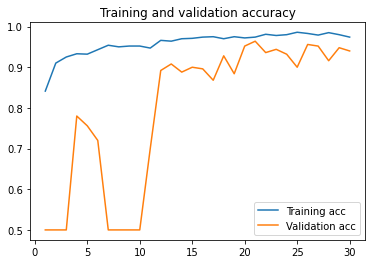

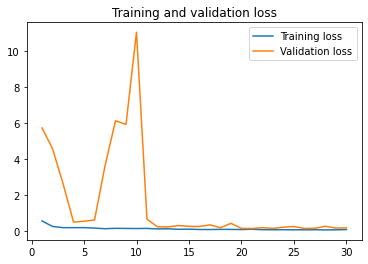

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [44]:
# glob data
# test_close_eyes = glob.glob('C:/Users/user/fci-project/selected2/dataset_new/test/Closed/*.jpg')
# test_open_eyes = glob.glob('C:/Users/user/fci-project/selected2/dataset_new/test/Open/*.jpg')
# len(test_close_eyes),len(test_open_eyes)

(100, 100)

In [45]:
#create labels
# close_eyes_labels=np.zeros(len(test_close_eyes),dtype=int)
# open_eyes_labels=np.ones(len(test_open_eyes),dtype=int)

# len(close_eyes_labels),len(open_eyes_labels)

(100, 100)

In [46]:
# test_eyes=np.concatenate((np.array(test_close_eyes),np.array(test_open_eyes)))
# test_labels=np.concatenate((close_eyes_labels,open_eyes_labels))
# test_labels[0],test_eyes[0]

(0, 'C:/Users/user/fci-project/selected2/dataset_new/test/Closed\\_0.jpg')

In [47]:
# test_imgs=[]
# for img in test_eyes:
#     test_imgs.append( cv2.resize(cv2.imread(img), (128,128)))
    
# test_imgs=np.array(test_imgs)/255
# test_imgs.shape

(200, 128, 128, 3)

In [48]:
# from sklearn.utils import  shuffle
# X_test, y_test = shuffle(test_imgs,test_labels)

In [14]:
y_test[0:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

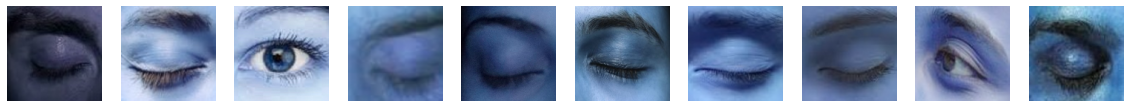

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 10, figsize = (20,20))
for i in range (0,10):
    ax[i].imshow(X_test[i])
    ax[i].axis('off')

In [22]:
import pickle
#pickle.dump(X_test, open('test_images.pkl', 'wb'))
# pickle.dump(y_test, open('test_labels.pkl', 'wb'))
# model.save("drowsiness_model-94")
model= keras.models.load_model("drowsiness_model-94")
X_test = pickle.load(open('test_images.pkl', 'rb'))
y_test = pickle.load(open('test_labels.pkl', 'rb'))



In [108]:

image=np.expand_dims(X_test[2],axis=0)
pred=model.predict(image)
pred
pred=int(np.around(pred))
pred


1

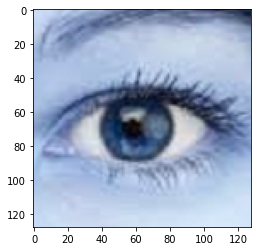

In [109]:
plt.imshow(X_test[2])

In [55]:
type(pred)

int

<AxesSubplot:>

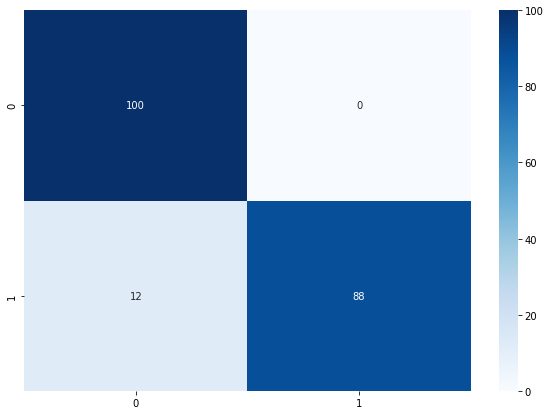

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import classification_report

y_test_predict=model.predict(X_test)
y_test_predict = np.around(y_test_predict)
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_test_predict)


plt.figure(figsize = (10,7))
sn.heatmap(cf_matrix, annot=True,cmap='Blues', fmt='g')

In [58]:


target_names = ['close', 'open']
print(classification_report(y_test,  y_test_predict,target_names=target_names))

              precision    recall  f1-score   support

       close       0.89      1.00      0.94       100
        open       1.00      0.88      0.94       100

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200

